# Week 2 Part 1 Assignment Graph Visualization
## Group: Haig Bedros, Noori Selina, Matthew Roland, & Julia Ferris

1. Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.

In [4]:
# The data from facebook's social circles - https://snap.stanford.edu/data/ego-Facebook.html

import networkx as nx
import matplotlib.pyplot as plt
import requests

url = 'https://raw.githubusercontent.com/hbedros/graph-visualization/main/facebook_combined.txt'

# Load the data
def load_graph_from_url(url):
    response = requests.get(url)
    with open('facebook_combined.txt', 'wb') as f:
        f.write(response.content)
    g = nx.read_edgelist('facebook_combined.txt', nodetype=int)
    return g

## Data

This data shows information about Facebook's social circles. Users in the same circles, people who are friends with each other, will have a connection. Below, some information about the data set is displayed - the number of nodes and the number of edges. The data contains 4039 nodes with 88,234 edges.

In [5]:
g = load_graph_from_url(url)

print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")

Number of nodes: 4039
Number of edges: 88234


2. Create basic analysis on the g, including the g’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.

In this analysis, the diameter of the graph and the average clustering coefficient were calculated. The diameter was calculated with the diameter function from the NetworkX library. The average clustering coefficient was also calculated with a function from the NetworkX library - the average clustering coefficient function. The diameter was found to be 8. This means the maximum path that connect one node to another. The most two nodes are distant from each other is 8 nodes. The average clustering coefficient was found to be 0.6055. A value close to 0 indicates no clustering. A value close to 1 indicates all nodes connect to each other. A value of 0.6055 shows that many of the nodes are connected, but a little over half are clustered. This can be seen in the graphs in question 3.

In [6]:
# From Networkx Library: Using the diameter fucntion
if nx.is_connected(g):
    diameter = nx.diameter(g)
    print(f"Diameter of the graph: {diameter}")

# From Networkx Library: Using the average clustering fucntion
avg_clustering_coefficient = nx.average_clustering(g)
print(f"Average clustering coefficient: {avg_clustering_coefficient:.4f}")

Diameter of the graph: 8
Average clustering coefficient: 0.6055


3. Use a visualization tool of your choice to display information. Use NetworkX directly or pyviz or another tool. You can try Gephi too if you like or Neo4j but you should get used to use the Python toolset.

The first graph shows a network of all the data with 4039 nodes. This shows clustering in many areas. Based on the meaning of the data, this makes sense. Many people are friends with many other people.

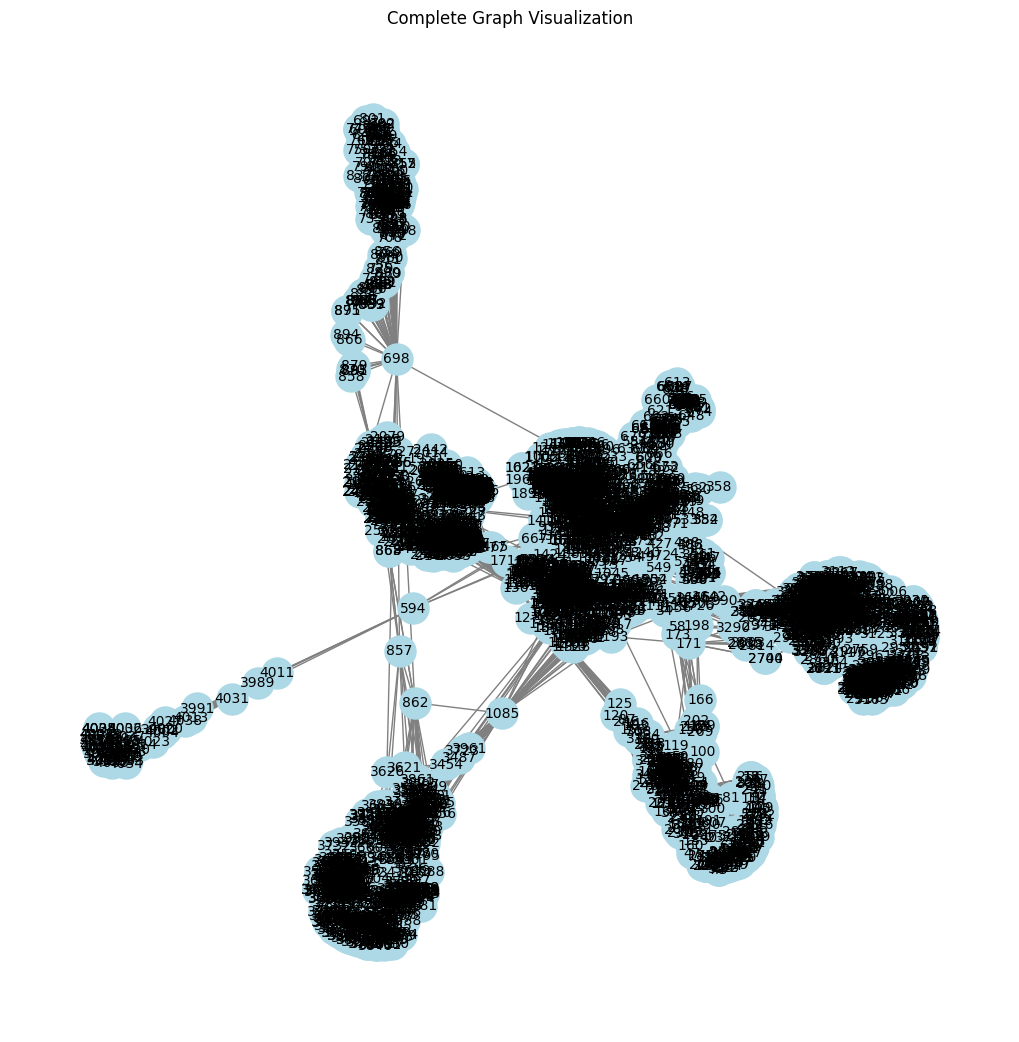

In [8]:
# Plotting
plt.figure(figsize=(10, 10))
nx.draw(g, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', edge_color='gray')
plt.title('Complete Graph Visualization')
plt.show()

This second graph shows a smaller graph of only 10 nodes. This shows a smaller set to clearly indicate how different nodes are connected to each other. Here we see all nodes connect to 0, and nodes 3 and 9 connect to each other. In the context of the data, all people are friends with user 0, but users 3 and 9 are also facebook friends with each other.

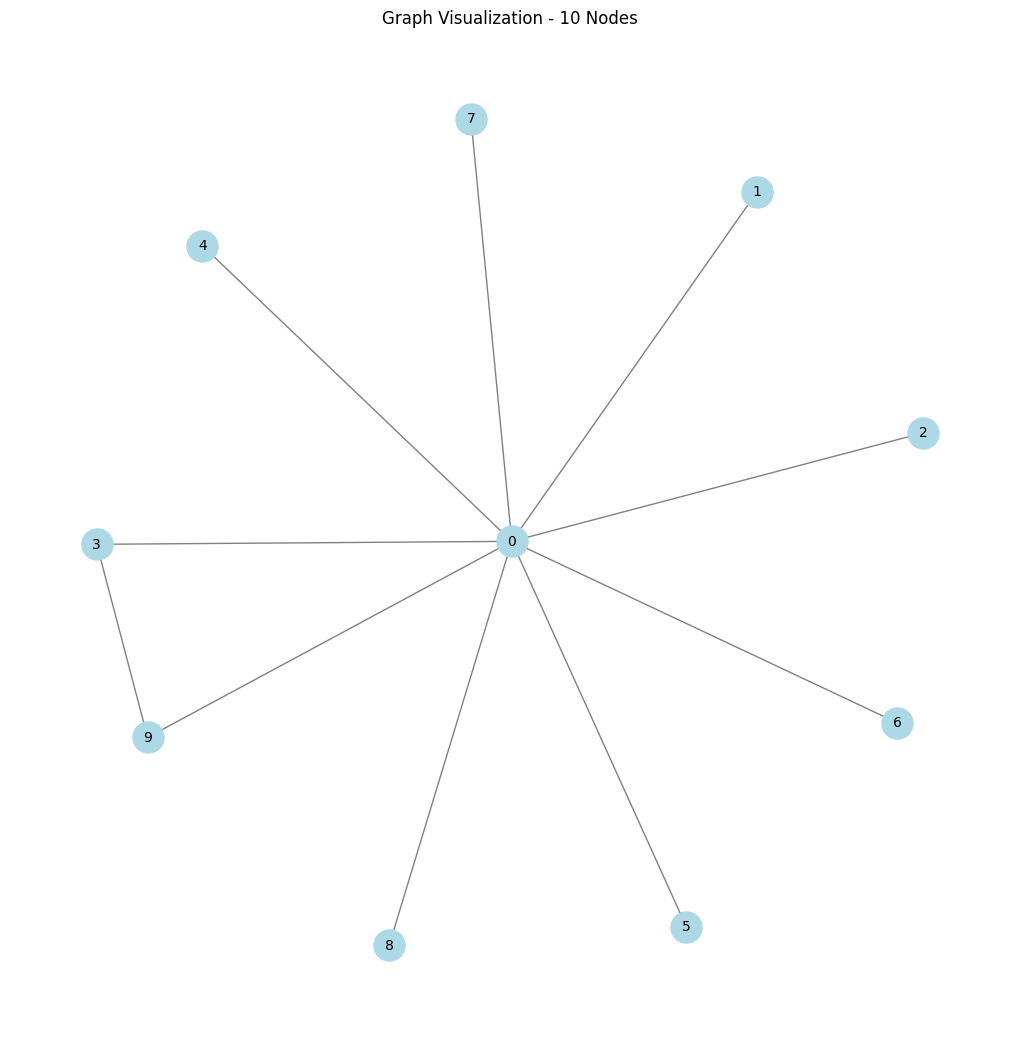

In [9]:
# Plotting a graph with only the first 10 nodes
ten_nodes = list(g.nodes())[:10]

new_graph = g.subgraph(ten_nodes)

plt.figure(figsize=(10, 10))
nx.draw(new_graph, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', edge_color='gray')
plt.title('Graph Visualization - 10 Nodes')
plt.show()